In [1]:
# Function estimation using neural network, libraries

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy import asarray
from matplotlib import pyplot as plt
import math as m
import random as r
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix

In [2]:
import os

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_path = '/content/drive/MyDrive/CS4243 Project/data/image_data_cleaned'
test_path = '/content/drive/MyDrive/CS4243 Project/data/test_image_data_cleaned'

In [4]:
image_size = (256,256)
batch_size = 16

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split=0.2,
    subset="training",
    seed=110,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split=0.2,
    subset="validation",
    seed=110,
    image_size=image_size,
    batch_size=batch_size,
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    seed=110,
    image_size=image_size,
    batch_size=batch_size,
)

Found 3363 files belonging to 2 classes.
Using 2691 files for training.
Found 3363 files belonging to 2 classes.
Using 672 files for validation.
Found 1931 files belonging to 2 classes.


In [5]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.2),
        layers.experimental.preprocessing.RandomZoom(0.2),  # Randomly zoom into images
        layers.experimental.preprocessing.RandomTranslation(0.2, 0.2),  # Randomly translate images
        layers.experimental.preprocessing.RandomContrast(0.2),  # Randomly adjust contrast
    ]
)

In [24]:
from tensorflow.keras.applications import VGG16
def make_model(input_shape, num_classes):
    # inputs = keras.Input(shape=input_shape)
    # x = data_augmentation(inputs)
    # x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)

    # # Convolutional Block 1
    # x = layers.Conv2D(32, 3, padding="same", activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_regularizer=keras.regularizers.l2(0.01))(x)
    # x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    # x = layers.BatchNormalization()(x)


    # # Convolutional Block 2
    # # x = layers.Conv2D(64, 3, padding="same", activation="relu")(x)
    # # x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    # # x = layers.BatchNormalization()(x)
    # x = layers.Conv2D(64, 3, padding="same", activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_regularizer=keras.regularizers.l2(0.01))(x)
    # x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    # x = layers.BatchNormalization()(x)


    # x = layers.GlobalAveragePooling2D()(x)

    # # x = layers.Dense(256, activation='relu')(x)
    # x = layers.Dense(256, kernel_regularizer=keras.regularizers.l2(0.01))(x)
    # # x = layers.Dropout(0.5)(x)  # Adding dropout for regularization
    # x = layers.Dense(128, activation='relu')(x)
    # x = layers.Dropout(0.3)(x)  # Adding dropout for regularization
    # x = layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.01))(x)

    # outputs = layers.Dense(1, activation='sigmoid')(x)

    # model = keras.Model(inputs, outputs)
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the layers in the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Create a new model by adding custom layers on top of the pre-trained base
    model = keras.Sequential([
        data_augmentation,
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='sigmoid')
    ])

    return model

In [25]:
num_classes = 1
model = make_model(input_shape=image_size + (3,), num_classes=num_classes)

In [26]:
optimizer = tf.keras.optimizers.Adam(0.001)
optimizer.learning_rate.assign(0.0001)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1e-04>

In [27]:
epochs = 15

In [ ]:
# from keras.callbacks import LearningRateScheduler

# def schedule(epoch, lr):
#     if epoch < 13:
#         return 0.0001
#     else:
#         return 0.0001 * tf.math.exp(0.1 * (13 - epoch))

# # Create an instance of the LearningRateScheduler callback
# lr_scheduler = LearningRateScheduler(schedule)

In [30]:
# compiling and training our model
model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [32]:
# model.summary()

In [33]:
history = model.fit(
    train_ds, epochs=epochs,
    validation_data=val_ds,


)

Epoch 1/15
169/169 [==============================] - 90s 488ms/step - loss: 1.3964 - accuracy: 0.5671 - val_loss: 0.7381 - val_accuracy: 0.6205
Epoch 2/15
169/169 [==============================] - 85s 481ms/step - loss: 0.9363 - accuracy: 0.6080 - val_loss: 0.5884 - val_accuracy: 0.6786
Epoch 3/15
169/169 [==============================] - 88s 498ms/step - loss: 0.7584 - accuracy: 0.6388 - val_loss: 0.5225 - val_accuracy: 0.7277
Epoch 4/15
169/169 [==============================] - 84s 483ms/step - loss: 0.7021 - accuracy: 0.6540 - val_loss: 0.5028 - val_accuracy: 0.7589
Epoch 5/15
169/169 [==============================] - 88s 502ms/step - loss: 0.6576 - accuracy: 0.6630 - val_loss: 0.4838 - val_accuracy: 0.7738
Epoch 6/15
169/169 [==============================] - 87s 500ms/step - loss: 0.6000 - accuracy: 0.6942 - val_loss: 0.4495 - val_accuracy: 0.8065
Epoch 7/15
169/169 [==============================] - 86s 493ms/step - loss: 0.5956 - accuracy: 0.6919 - val_loss: 0.4366 - val_ac

In [37]:
model.save('/content/drive/MyDrive/CS4243 Project/models/jevnet_VGG16_transfer_with_data_aug_15epochs_leakyRelu.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


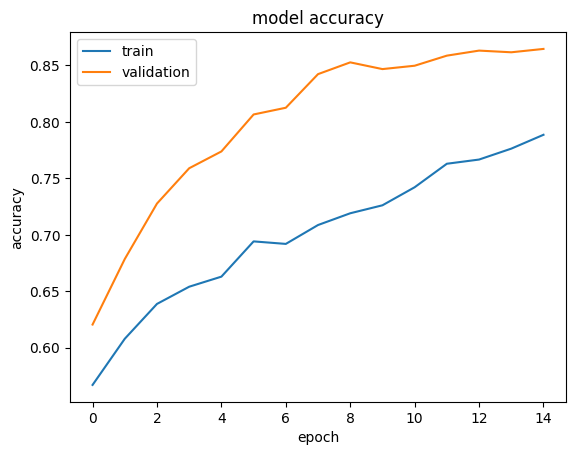

In [34]:
# Accuracy curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

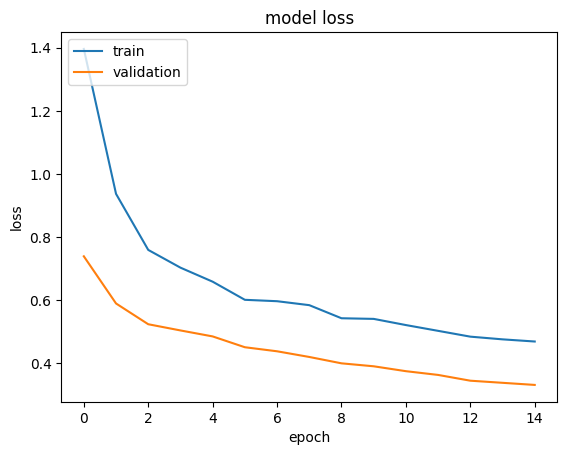

In [35]:
# Loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [36]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_ds)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)



121/121 [==============================] - 37s 275ms/step - loss: 0.6941 - accuracy: 0.6494
Test Loss: 0.6941143870353699
Test Accuracy: 0.6494044661521912


In [23]:
predictions = model.predict(test_ds)
true_labels = np.concatenate([labels for _, labels in test_ds], axis=0)
threshold = 0.5
predicted_labels = (predictions > threshold).astype(int)
# print(predicted_labels.ravel()[:10])
# print(true_labels[:10])

cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

TN, FP, FN, TP = confusion_matrix(true_labels, predicted_labels).ravel()
print(f"TN:{TN}")
print(f"FP:{FP}")
print(f"FN:{FN}")
print(f"TP:{TP}")

121/121 [==============================] - 33s 247ms/step
Confusion Matrix:
[[774 427]
 [462 268]]
TN:774
FP:427
FN:462
TP:268
